In [1]:
import numpy as np

help(np.convolve)

Help on function convolve in module numpy:

convolve(a, v, mode='full')
    Returns the discrete, linear convolution of two one-dimensional sequences.
    
    The convolution operator is often seen in signal processing, where it
    models the effect of a linear time-invariant system on a signal [1]_.  In
    probability theory, the sum of two independent random variables is
    distributed according to the convolution of their individual
    distributions.
    
    If `v` is longer than `a`, the arrays are swapped before computation.
    
    Parameters
    ----------
    a : (N,) array_like
        First one-dimensional input array.
    v : (M,) array_like
        Second one-dimensional input array.
    mode : {'full', 'valid', 'same'}, optional
        'full':
          By default, mode is 'full'.  This returns the convolution
          at each point of overlap, with an output shape of (N+M-1,). At
          the end-points of the convolution, the signals do not overlap
          co

## Use case #1: computing and plotting running mean of time series

We'll look at a straightforward dataset, which consists of quarterly measurements of the gas used in the UK, recorded from 1960 to 1986. This is a simple relationship of the type $$y=f(x),$$ where $x$ is the year and $y$ is the gas used.

The original units are megatherms. 1 megatherm is about 30,000,000 kWh.

In [2]:
import matplotlib.pyplot as plt
import ipy_table

path = "../../data/gas.csv"
gas = np.loadtxt(path, delimiter=',')

ipy_table.make_table(gas[:16])
ipy_table.apply_theme('basic_left')

1.0000,1960.0000,160.1000
2.0000,1960.2500,129.7000
3.0000,1960.5000,84.8000
4.0000,1960.7500,120.1000
5.0000,1961.0000,160.1000
6.0000,1961.2500,124.9000
7.0000,1961.5000,84.8000
8.0000,1961.7500,116.9000
9.0000,1962.0000,169.7000
10.0000,1962.2500,140.9000
11.0000,1962.5000,89.7000


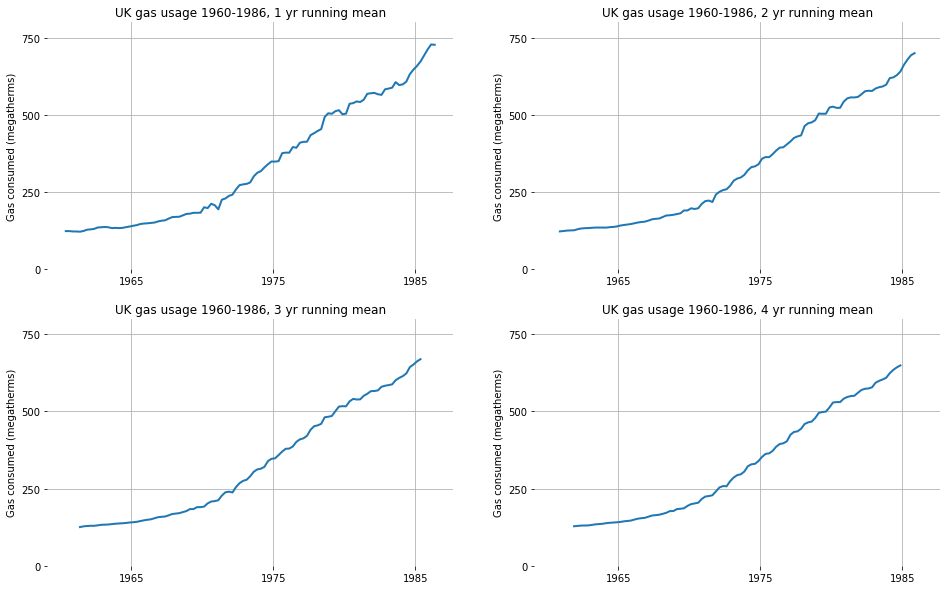

In [3]:
N = (4, 8, 12, 16) # Moving average window sizes 
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(2,2,1) # Create first axis here to enable constant x-axis guide

for i,n in enumerate(N):
    if i > 0:
        ax = fig.add_subplot(2,2,i+1, sharex=ax)
    smoothed_data = np.convolve(gas[:,2], np.ones((n,))/n, mode='valid')
    smoothed_t = np.convolve(gas[:,1], np.ones((n,))/n, mode='valid')
    ax.plot(smoothed_t, smoothed_data, linewidth=2) 
    ax.set_ylabel('Gas consumed (megatherms)')
    ax.grid("on")
    ax.set_frame_on(False)
    ax.set_xticks([1965, 1975, 1985])
    ax.set_yticks([0, 250, 500, 750])
    ax.set_ylim(0,800)
    ax.set_title("UK gas usage 1960-1986, {year} yr running mean".format(year=round(n/4)))

**Figure 1:** Gas usage in the UK, 1960-1986. Gas usage has increased over time, with a notable increase in the trend after 1970.

**References:** 
1. John H. Williamson, *Data Fundamentals lecture on Scientific Visualization*, University of Glasgow, 2019 Autumn